load final_step_bias_check_results.csv

In [12]:


from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving final_step_bias_check_results.csv to final_step_bias_check_results (2).csv
User uploaded file "final_step_bias_check_results (2).csv" with length 274568 bytes


In [13]:
import pandas as pd

df = pd.read_csv("final_step_bias_check_results.csv")


In [14]:
import json
import matplotlib.pyplot as plt

def plot_step_importance(row):
    try:
        # Fix formatting and parse JSON
        raw = row["lines_and_importance"].replace("'", '"').replace('}"{', '}, {')
        steps = json.loads(raw)

        # Extract step labels and importance scores
        step_labels = []
        step_scores = []
        for step in steps:
            text = step.get("text", "")
            if "Step" in text:
                label = text.strip().split(":")[0]  # e.g., "Step 1"
                score = step.get("importance", 0.0)
                step_labels.append(label)
                step_scores.append(score)

        if not step_labels:
            print("⚠️ No valid steps found in this row.")
            return

        # Plot
        plt.figure(figsize=(10, 4))
        plt.bar(step_labels, step_scores, color="mediumseagreen")
        plt.title("Step-Level Importance Attribution")
        plt.xlabel("Reasoning Steps")
        plt.ylabel("Importance Score")
        plt.ylim(0, max(step_scores) * 1.1)
        plt.grid(axis="y", linestyle="--", alpha=0.4)
        plt.show()

    except Exception as e:
        print(f"❌ Failed to generate plot: {e}")


Run a Plot now .Pick a row (for example, the 2nd row):

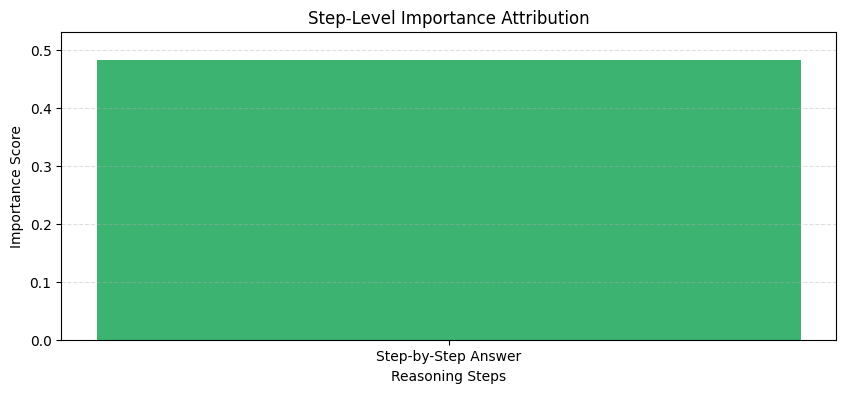

In [15]:
plot_step_importance(df.iloc[1])

or Try several rows


🔹 Example 1
❌ Failed to generate plot: Expecting ',' delimiter: line 1 column 558 (char 557)

🔹 Example 2


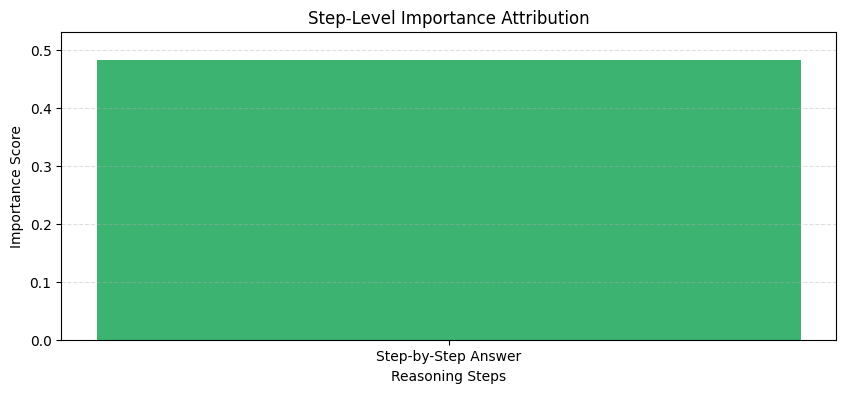


🔹 Example 3


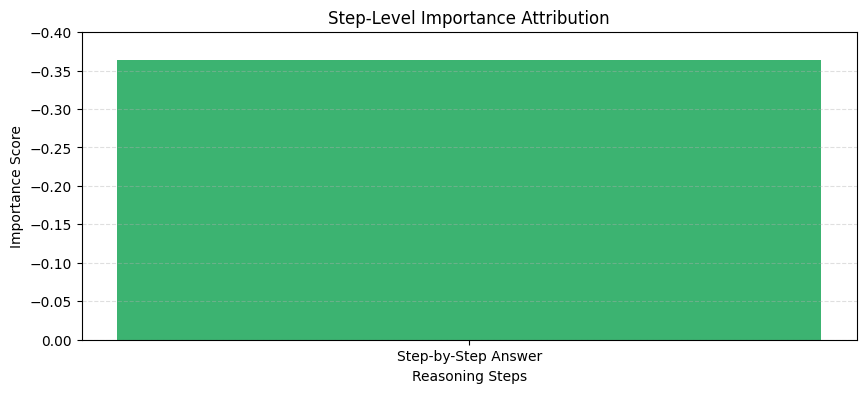

In [16]:
for i in range(3):
    print(f"\n🔹 Example {i+1}")
    plot_step_importance(df.iloc[i])
